# Capitulo 2. Proyecto de Machine Learning

👀: verifica que si hayas instalado las librerías que vas a necesitar

En este caso se realizará un modelo para predecir la media de precios en las viviendas de los diferentes municipos de Londres, Reino Unido 🇬🇧.

## <span style="color:green">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todas las bases de datos de este curso en GitHub:https://github.com/a2Proyectos/MachineLearning_Data

- housing_in_london_yearly_variables.csv, con los datos que necesitamos para hacer la regresión.
- London_Borough_Excluding_MHW.shp, con los datos que necesitamos para graficar Londres.
- Capitulo_2/housing_in_london_monthly_variables.csv, con los datos de la media salarial

In [38]:
## Importamos nuestras librerias principales panda, numpy, matplotlib, os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
## Definimos una función para extraer datos.
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
LONDON_SALARY = "Capitulo_2/housing_in_london_yearly_variables.csv"
LONDON_HOUSING = "Capitulo_2/housing_in_london_monthly_variables.csv"
#LONDON_MAP = os.path.abspath("") + "\map\London_Borough_Excluding_MHW.shp"

In [40]:
def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

In [41]:
df2= extraer_datos(DOWNLOAD_ROOT, LONDON_SALARY)
df2.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1


In [42]:
df1 = extraer_datos(DOWNLOAD_ROOT, LONDON_HOUSING)
df1.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1


***

## <span style="color:green">2. Vistazo a la Base de Datos</span>

In [43]:
#Filtrar los datos 
df2 = df2.filter(["median_salary", "area", "date"])
df2.head()

,median_salary,area,date
0,"33,020.00",city of london,1999-12-01
1,"21,480.00",barking and dagenham,1999-12-01
2,"19,568.00",barnet,1999-12-01
3,"18,621.00",bexley,1999-12-01
4,"18,532.00",brent,1999-12-01


In [44]:
## Juntamos nuestra base de datos de la media salarial, con la de datos de Londres.
data = df2.merge(df1, on= ["area", "date"])
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1


In [45]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 56.6+ KB


👀:Comienza a ver el tipo de variable, de eso depende el análisis que le demos o si necesitamos cambiarlas a otro tipo de variable

***

In [46]:
# Una forma muy común para saber que tipo de datos contiene alguna variable de tipo objeto, es contar sus valores, ejemplo:
data["area"].value_counts()

area
city of london            21
westminster               21
newham                    21
redbridge                 21
richmond upon thames      21
southwark                 21
sutton                    21
tower hamlets             21
waltham forest            21
wandsworth                21
north east                21
lewisham                  21
north west                21
east midlands             21
west midlands             21
london                    21
south east                21
south west                21
inner london              21
outer london              21
merton                    21
lambeth                   21
barking and dagenham      21
greenwich                 21
barnet                    21
bexley                    21
brent                     21
bromley                   21
camden                    21
croydon                   21
ealing                    21
enfield                   21
hackney                   21
kingston upon thames      21
hammersmi

In [47]:
# Utilizamos este comando para cambiar la notación científica de los valores que me muestra python
pd.options.display.float_format = "{:,.2f}".format

In [48]:
# Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe(), ejemplo:
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


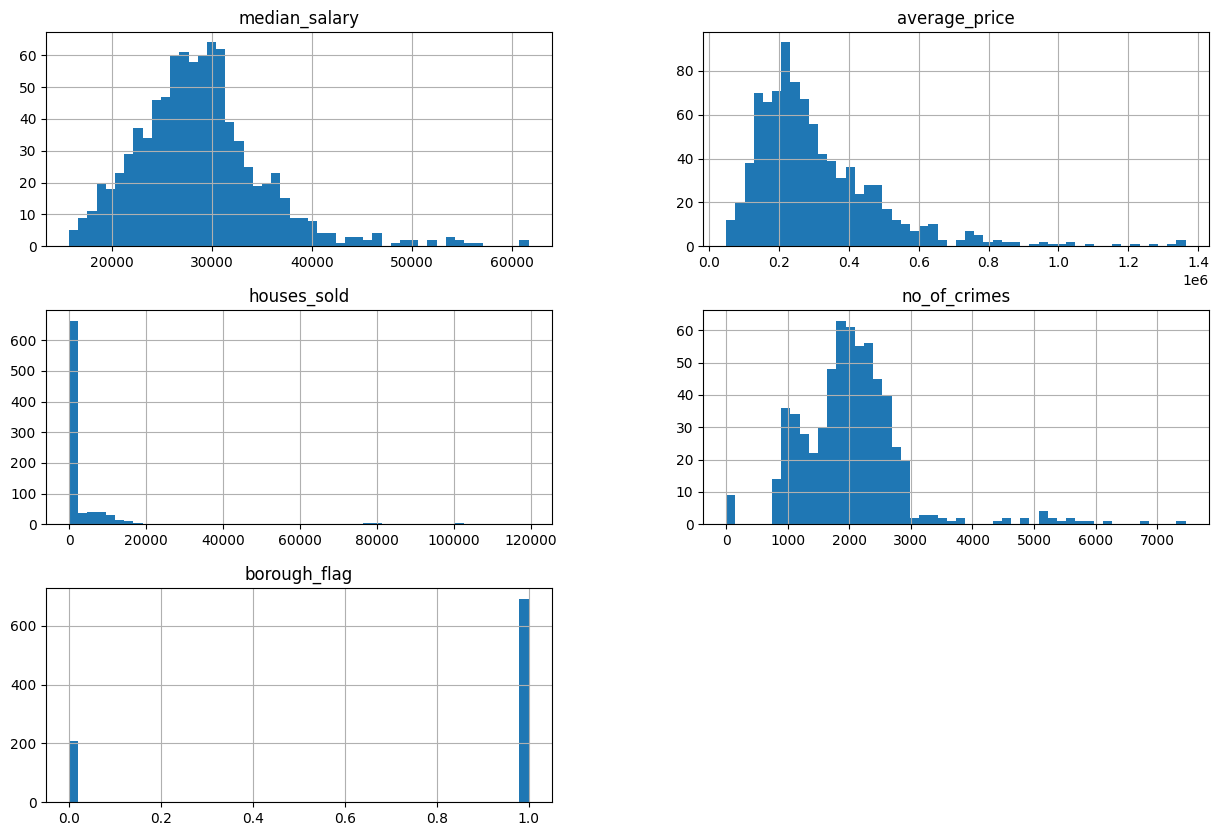

In [49]:
# Realiza un Histograma para visualizar los datos 
#matplotlib inline para aquellos que estan con jupyter notebook
data.hist(bins=50, figsize= (15, 10))
plt.show()

***

## <span style="color:green">3. Crear un set de entrenamiento y de prueba </span>

Recuerden que nuestro set de prueba lo pondremos de lado por ahora, sin verlo. No sean tramposos ❌

In [50]:
#Importamos la función para dividir los datos train_test_split
from sklearn.model_selection import train_test_split

In [51]:
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatorios.
train, test = train_test_split(data, test_size=.3, random_state= 45)

In [52]:
#confirmamos la división
print(len(train))
print(len(test))

632
271


Ya tenemos nuestro set de prueba y nuestro set de entrenamiento ✅

***

### <span style="color:blue">3.1 Evitar Sesgo </span>

<Axes: >

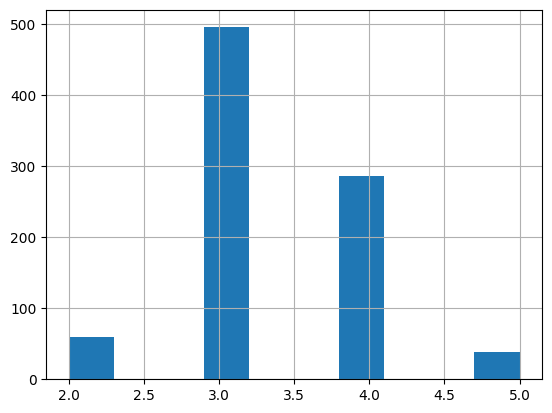

In [53]:
# Para categorizar una variable, ejemplo con 5 niveles. 
data["salary_cat"] = pd.cut(data["median_salary"], bins=[0, 10000, 20000, 30000, 40000, np.inf], labels= [1, 2, 3, 4, 5])
                           
#Hacer un histograma de las categorías
data["salary_cat"].hist()

In [54]:
#Verificar que no existen datos en el bin #1
data["salary_cat"].value_counts()

salary_cat
3    496
4    287
2     59
5     39
1      0
Name: count, dtype: int64

In [55]:
# Redefinir en 4 categorías, quitando en donde no hay datos (el bin#1)
data = data.dropna(subset= ["median_salary"]).reset_index()

data["salary_cat"] = pd.cut(data["median_salary"], bins=[10000, 20000, 30000, 40000, np.inf], labels= [1, 2, 3, 4])

In [56]:
#Verifica que si se redefinieron las categorías 
data["salary_cat"].value_counts()

salary_cat
2    496
3    287
1     59
4     39
Name: count, dtype: int64

<Axes: >

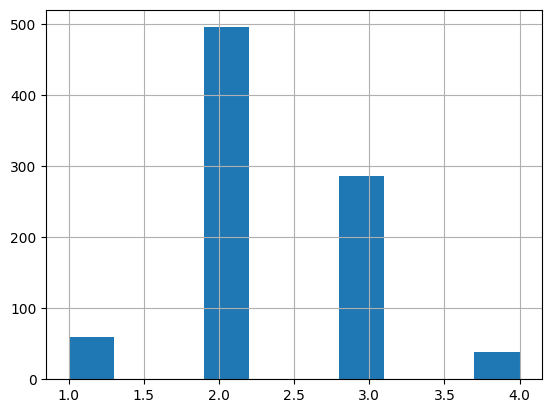

In [57]:
data["salary_cat"].hist()

Vamos a tener que separar en train y test para cada categoría así evitamos el sesgo por salarios

In [58]:
# Esta librería nos va a permitir dividir el dataset de forma estratificada 
from sklearn.model_selection import StratifiedShuffleSplit

In [59]:
## Dividir datos basándonos en nuestras categorías de salarios
dividir = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state=45)

In [60]:
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
for train_index, test_index in dividir.split(data, data["salary_cat"]):
    cat_set_train = data.loc[train_index]
    cat_set_test = data.loc[test_index]

In [61]:
cat_set_train["salary_cat"].value_counts()

salary_cat
2    347
3    201
1     41
4     27
Name: count, dtype: int64

In [62]:
cat_set_test["salary_cat"].value_counts()

salary_cat
2    149
3     86
1     18
4     12
Name: count, dtype: int64

***

In [63]:
# Creamos dataframe para trabajar con el set de entrenamiento
df_train = cat_set_train.copy() 

In [64]:
df_train.head()

,index,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,151841,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,279575,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,223743,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,223141,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,262106,E09000013,255.00,NaN,1,2


***

**Ejercicio:** Incluir en el análisis los salarios promedio por zona (apoyarse del video 21)

***

## <span style="color:green">4. Medir la Correlación </span>


In [69]:
# Crear matriz de correlación
matriz = df_train[["median_salary", "average_price", "houses_sold", "no_of_crimes", "borough_flag"]].corr(method = "pearson")

# Comparar correlación
matriz["average_price"].sort_values(ascending= False)

average_price    1.00
median_salary    0.65
borough_flag     0.33
no_of_crimes     0.17
houses_sold     -0.19
Name: average_price, dtype: float64

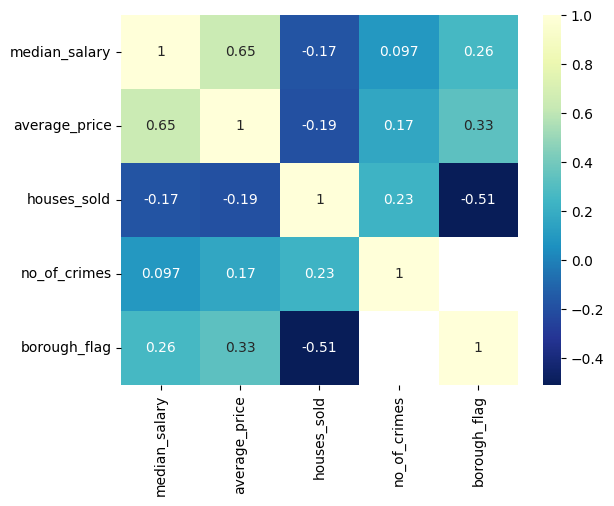

In [71]:
#Importar seaborn 
import seaborn as sns

# Crear vector
plt = sns.heatmap(matriz, annot=True, cmap= "YlGnBu_r")

# Graficar


In [75]:
#Importar pandas 
from pandas.plotting import scatter_matrix

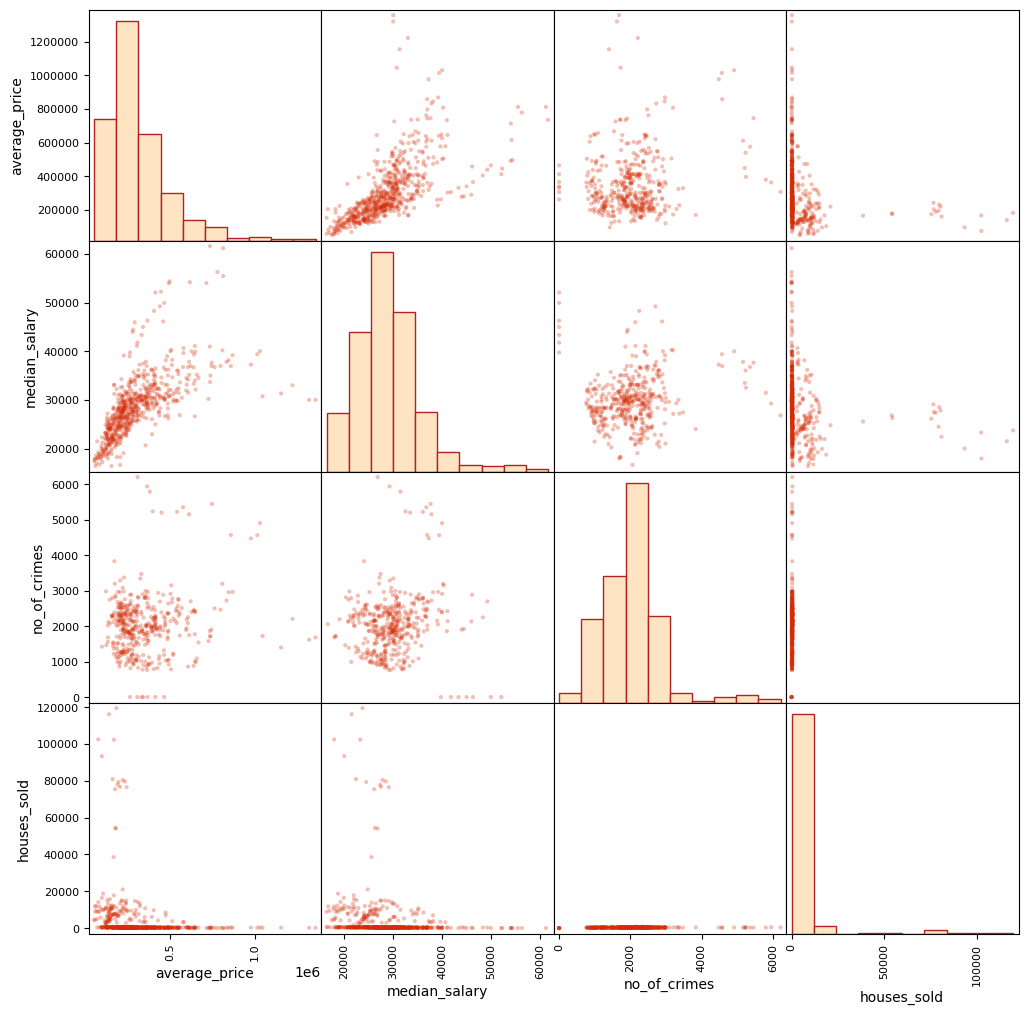

In [77]:
#Para graficar scatter_matrix...
columns = ["average_price", "median_salary", "no_of_crimes", "houses_sold"]

scatter_matrix(df_train[columns], figsize = (12, 12), color = "#D52B06", alpha= 0.3,
                hist_kwds = {"color":["bisque"], "edgecolor": "firebrick"});

<Axes: xlabel='median_salary', ylabel='average_price'>

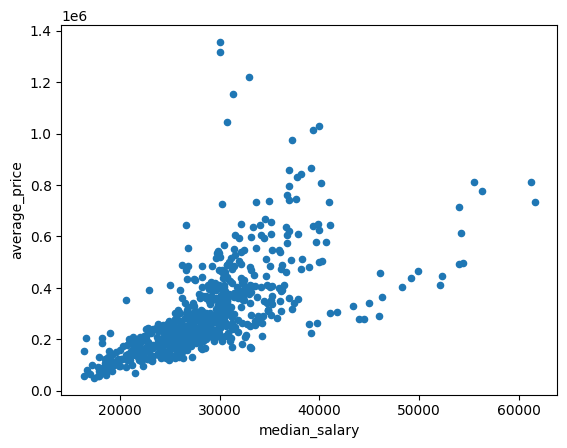

In [80]:
#Por si quieren ver una gráfica en específico más a detalle
df_train.plot(kind="scatter", y="average_price", x= "median_salary")

***

## <span style="color:green">5. Combinación de Variables </span>


In [81]:
#Armar una columna para hacer las combinaciones que necesitamos
# Crear matriz de correlación
df_train["vendidas_poblacion"] = df_train["no_of_crimes"]/df_train["houses_sold"]

In [84]:
matriz = df_train[["median_salary", "average_price", "houses_sold", "no_of_crimes", "borough_flag", "vendidas_poblacion"]].corr(method = "pearson")

matriz["average_price"].sort_values(ascending= False)

average_price         1.00
median_salary         0.65
vendidas_poblacion    0.33
borough_flag          0.33
no_of_crimes          0.17
houses_sold          -0.19
Name: average_price, dtype: float64

***

***

## <span style="color:Blue">6. Transformación de Datos </span>


In [85]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_train["average_price"] # la variable a predecir
#Nuevo dataframe sin average_price
df = cat_set_train.drop("average_price", axis=1) # los predictores


,index,median_salary,area,date,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,NaN,1,2
...,...,...,...,...,...,...,...,...,...
618,633,"31,491.00",wandsworth,2013-12-01,E09000032,659.00,"1,632.00",1,3
249,262,"24,209.00",brent,2005-12-01,E09000005,303.00,"2,577.00",1,2
436,450,"27,497.00",kingston upon thames,2009-12-01,E09000021,221.00,914.00,1,2
326,339,"24,798.00",south east,2006-12-01,E12000008,"20,999.00",NaN,0,2


***

### Datos vacíos (NULLs)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 323 to 841
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          616 non-null    int64   
 1   median_salary  616 non-null    float64 
 2   area           616 non-null    object  
 3   date           616 non-null    object  
 4   code           616 non-null    object  
 5   houses_sold    589 non-null    float64 
 6   no_of_crimes   423 non-null    float64 
 7   borough_flag   616 non-null    int64   
 8   salary_cat     616 non-null    category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 44.1+ KB


In [89]:
#Darte una idea de a qué variables le hace faltan datos
#Calcular la suma de todos los vacíos  
df.isna().sum()

index             0
median_salary     0
area              0
date              0
code              0
houses_sold      27
borough_flag      0
salary_cat        0
dtype: int64

In [88]:
#Quitar el número de crímenes por su alta cantidad de datos vacíos 
df = df.drop("no_of_crimes", axis = 1)

In [93]:
#Tomamos la media 
median = df["houses_sold"].median()
median

349.0

In [94]:
#Llenamos los valores con la media
df["houses_sold"].fillna(median, inplace = True)

In [96]:
#Verifica que no hay datos vacíos
df.isna().sum()

index            0
median_salary    0
area             0
date             0
code             0
houses_sold      0
borough_flag     0
salary_cat       0
dtype: int64

***

Recuerden que volvimos a ejecutar la línea de código de "df = cat_set_ent.drop('average_price', axis=1)" para hacer este ejercicio. Es una alternativa a lo que hicimos recien con Pandas.

In [109]:
df2 = cat_set_train.drop("average_price", axis=1)
df2

,index,median_salary,area,date,code,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336,"21,946.00",east midlands,2006-12-01,E12000004,"10,413.00",NaN,0,2
424,438,"28,234.00",ealing,2009-12-01,E09000009,312.00,"2,392.00",1,2
560,574,"28,326.00",havering,2012-12-01,E09000016,231.00,"1,452.00",1,2
481,495,"30,806.00",lewisham,2010-12-01,E09000023,242.00,"2,119.00",1,3
53,55,"25,264.00",hammersmith and fulham,2000-12-01,E09000013,255.00,NaN,1,2
...,...,...,...,...,...,...,...,...,...
618,633,"31,491.00",wandsworth,2013-12-01,E09000032,659.00,"1,632.00",1,3
249,262,"24,209.00",brent,2005-12-01,E09000005,303.00,"2,577.00",1,2
436,450,"27,497.00",kingston upon thames,2009-12-01,E09000021,221.00,914.00,1,2
326,339,"24,798.00",south east,2006-12-01,E12000008,"20,999.00",NaN,0,2


In [110]:
df2.isna().sum()

index              0
median_salary      0
area               0
date               0
code               0
houses_sold       27
no_of_crimes     193
borough_flag       0
salary_cat         0
dtype: int64

In [111]:
#BIENVENIDOS A SCIKIT <3 Serán unos expertos al final. 
# Rellenar valores con scikit
#1. Recuerden: importar lo que vayas a utiliza, en este caso SimpleImputer
from sklearn.impute import SimpleImputer

In [112]:
# 2. Crear objeto, en este caso se llamará imputer
imputer = SimpleImputer(strategy="median") # nos traemos todos los atributos de SimpleImputer al objeto imputer

In [113]:
df_num = df2.drop("no_of_crimes", axis=1)

In [114]:
# data numérico. voy a tener que dropear las columnas que no lo sean.
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 323 to 841
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          616 non-null    int64   
 1   median_salary  616 non-null    float64 
 2   area           616 non-null    object  
 3   date           616 non-null    object  
 4   code           616 non-null    object  
 5   houses_sold    589 non-null    float64 
 6   borough_flag   616 non-null    int64   
 7   salary_cat     616 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 39.3+ KB


In [115]:
df_num = df2.drop(["area", "date", "code"], axis = 1)

In [116]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 616 entries, 323 to 841
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   index          616 non-null    int64   
 1   median_salary  616 non-null    float64 
 2   houses_sold    589 non-null    float64 
 3   no_of_crimes   423 non-null    float64 
 4   borough_flag   616 non-null    int64   
 5   salary_cat     616 non-null    category
dtypes: category(1), float64(3), int64(2)
memory usage: 29.7 KB


In [117]:
#Ejecuta Imputer. Calcula todas las medianas del df_num.
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [118]:
#Aplicar transform para rellenar las medianas. Me devuelve una matriz.
X = imputer.transform(df_num)
X

array([[3.3600e+02, 2.1946e+04, 1.0413e+04, 2.0110e+03, 0.0000e+00,
        2.0000e+00],
       [4.3800e+02, 2.8234e+04, 3.1200e+02, 2.3920e+03, 1.0000e+00,
        2.0000e+00],
       [5.7400e+02, 2.8326e+04, 2.3100e+02, 1.4520e+03, 1.0000e+00,
        2.0000e+00],
       ...,
       [4.5000e+02, 2.7497e+04, 2.2100e+02, 9.1400e+02, 1.0000e+00,
        2.0000e+00],
       [3.3900e+02, 2.4798e+04, 2.0999e+04, 2.0110e+03, 0.0000e+00,
        2.0000e+00],
       [8.6000e+02, 6.1636e+04, 3.4900e+02, 2.0110e+03, 1.0000e+00,
        4.0000e+00]])

In [120]:
#Regresarlo a dataframe 
df_tr = pd.DataFrame(X, columns= df_num.columns, index = df_num.index)
df_tr

,index,median_salary,houses_sold,no_of_crimes,borough_flag,salary_cat
323,336.00,"21,946.00","10,413.00","2,011.00",0.00,2.00
424,438.00,"28,234.00",312.00,"2,392.00",1.00,2.00
560,574.00,"28,326.00",231.00,"1,452.00",1.00,2.00
481,495.00,"30,806.00",242.00,"2,119.00",1.00,3.00
53,55.00,"25,264.00",255.00,"2,011.00",1.00,2.00
...,...,...,...,...,...,...
618,633.00,"31,491.00",659.00,"1,632.00",1.00,3.00
249,262.00,"24,209.00",303.00,"2,577.00",1.00,2.00
436,450.00,"27,497.00",221.00,914.00,1.00,2.00
326,339.00,"24,798.00","20,999.00","2,011.00",0.00,2.00


In [121]:
df_tr.isna().sum()

index            0
median_salary    0
houses_sold      0
no_of_crimes     0
borough_flag     0
salary_cat       0
dtype: int64

### NOTA: ¿Por qué utilizaríamos el SimpleImputer si es mas complicado que usar Pandas?
Porque el SimpleImputer rellena todas las columnas al mismo tiempo y esto en un dataset mucho mayor nos va a insumir mucho menos tiempo con éste método.

***

## <span style="color:Blue">7. Manejo de texto y valores categóricos </span>

In [39]:
#definir que variable vamos a cambiar a valor numérico

#Convertir variables de texto en numéricas

#verificar que si se haya transformado


#Por si quieres ver como funciona el encoder


In [40]:
#ONE HOT ENCODER, es importante recordar y entender esta función porque la usaremos en todo el curso
#Convertir variables categóricas en binarias
#Importar OneHotEncoder

#Crear objeto

#Ajustar

#obligar a que nos muestre la matriz 


***

## <span style="color:Blue">8. Escalación de variables </span>


#### <span style="color:Blue">9.1 Normalización </span>

In [41]:
#Importar MinMaxScaler

#Creamos el objeto 

#Hacer un dataframe con la transformación


#### <span style="color:Blue">8.2 Estandarización </span>

In [42]:
## Estandarización (Es el más ultizado)
#Importar StandardScaler (presten especial atención a StandardScaler lo estaremos viendo muy seguido) 

#Crea objeto

#Hacer un dataframe con la transformación


***

## <span style="color:Blue">9. Pipeline </span>


In [43]:
# Crear función de pipeline


In [44]:
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)

#Hacer un datframe que usaremos para la regresión linea

#Visualiza los datos 


***

***

## <span style="color:purple">10. Seleccionar y entrenar modelos </span>

In [45]:
## Hacer Regresión Lineal (AL FIN)


In [46]:
#Análisis preambultario de los errores


***

#### <span style="color:purple">10.1 RMSE </span>

In [47]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE


In [48]:
#Sacar el promedio 


In [49]:
#Calcular el porcentaje de acierto


***

#### <span style="color:purple">10.2 Árbol de Decisión </span>

In [50]:
# importar DecisionTreeRegressor

#crear objeto 

#correrlo


#calcular el error


***

#### <span style="color:purple">10.3 Validación Cruzada </span>

¡Anota esto porque es importante!

In [51]:
#Importar cross_val_score, creo objeto, corro mi función


In [52]:
#Calcular el porcentaje de acierto de validación cruzada 


***

#### <span style="color:purple">10.4 Bosque Aleatorio </span>
¡Este también es importante!

In [53]:
#Importar RandomForestRegressor, creo objeto, corro mi función


#calcular el error


In [54]:
#Calcular el el promedio de la suma de los errores al cuadrado


In [55]:
#Calcular el porcentaje de acierto de bosque aleatorio


***

## <span style="color:purple">11. Afinar el modelo </span>

### <span style="color:purple">11.1 Grid Search</span>

In [56]:
#Importar GridSearchCV


### <span style="color:purple">11.2 set de prueba</span>

In [57]:
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 


#Aquí definimos cuál será nuestra variable a predecir y las predichas 



#Ahora, sí. El pipeline para limpieza de datos 



#Por último, ver el error del modelo 


In [58]:
#Ver el porcentaje de acierto
